#By Raghunadh(IMT2021042),Kushal(IMT2021035),Chokshi(IMT2021012)

In [117]:
import numpy as np
import pandas as pd
import urllib
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the files

In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
dataset = pd.read_csv('/content/drive/MyDrive/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')
t = test_data
# X = dataset.iloc[:,0:8]
# Y = dataset.iloc[:,8:9]
# d = pd.concat([X,test_data],axis=0)
# print(X.shape)
# print(test_data.shape)
dataset

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
0,448131,377,788,34.2,ZL,UVZ,HZU,Thursday,0
1,240679,4225,1135,24.0,PB,FYJ,EGO,Wednesday,1
2,519288,6390,735,17.0,LL,VQD,VIR,Sunday,1
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
4,34627,6322,855,15.8,LL,VIR,DFY,Monday,1
...,...,...,...,...,...,...,...,...,...
431500,463164,483,360,NaN,RP,GHQ,SKA,Monday,0
431501,341459,546,1008,7.4,EX,KQO,RJJ,Tuesday,0
431502,380981,1156,480,22.8,AI,PGZ,DWO,Saturday,0
431503,159563,1002,480,6.4,VS,RJJ,KQO,Friday,0


In [120]:
# from google.colab import drive
# drive.mount('/content/drive')
# test_data

#Drop duplicates

In [121]:
dataset.drop_duplicates(inplace = True)
duplicate_rows = dataset.duplicated()
duplicate_rows.sum()

0

In [122]:
test_data

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day
0,301196,1434,730,31.2,AI,PFR,OJD,Monday
1,116730,118,725,36.0,ZL,HZU,WSD,Monday
2,133420,3624,420,20.0,JN,SQV,PLD,Wednesday
3,120024,2753,1155,37.0,UB,HZU,OLW,Saturday
4,323948,600,1085,41.0,TK,ODV,PGZ,Wednesday
...,...,...,...,...,...,...,...,...
107872,538493,363,465,NaN,YM,OJD,SEL,Saturday
107873,479701,2655,959,13.8,VS,FKV,FOW,Saturday
107874,360982,3709,1300,NaN,PB,GWZ,JUE,Thursday
107875,423397,5532,897,17.4,BS,GFD,FPK,Saturday


#Filling nulls for test data and training data

In [123]:
null_journey_rows = dataset[dataset['Journey_Time'].isnull()]
null_journey_rows

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
3,209857,2254,820,NaN,TK,ODV,EXU,Monday,1
28,300306,1885,540,NaN,XX,VDW,GIZ,Wednesday,0
29,447837,779,1124,NaN,RX,GHQ,ODV,Thursday,0
32,73538,1050,360,NaN,RP,UGX,FOW,Friday,0
38,350171,1719,830,NaN,XX,VWO,ODA,Tuesday,1
...,...,...,...,...,...,...,...,...,...
431462,332725,164,1260,NaN,YM,WSD,MIN,Wednesday,0
431467,399764,5579,1064,NaN,BS,JVS,DWO,Thursday,0
431486,31275,147,795,NaN,CI,GWZ,DWO,Sunday,1
431494,479732,855,935,NaN,ZL,SEL,HZU,Monday,0


In [124]:
variance_by_busid = dataset.groupby('Bus_ID')['Journey_Time'].var()
print(variance_by_busid.mean())
dataset['Journey_Time'].var()

86.42588453595667


196.39879539888796

In [125]:
filtered_rows = dataset[dataset['Bus_ID'] == 1260]
filtered_rows

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day,Target
4995,481545,1260,883,29.0,CI,IOO,OHA,Tuesday,1
6651,419319,1260,384,22.0,AI,JHJ,VOF,Thursday,0
16915,515811,1260,1335,32.0,XX,PLD,OJD,Friday,0
17963,376360,1260,775,17.2,YM,LDG,ERV,Tuesday,1
20718,410950,1260,916,25.6,CI,IOO,OHA,Saturday,0
...,...,...,...,...,...,...,...,...,...
405169,396266,1260,384,NaN,AI,JHJ,VOF,Saturday,0
411970,246736,1260,916,25.6,CI,IOO,OHA,Tuesday,0
418505,15870,1260,1335,32.0,XX,PLD,OJD,Thursday,1
424455,47588,1260,1335,32.0,XX,PLD,OJD,Saturday,0


In [126]:
def impute_null_values(group):
    group = group.fillna(group.mean(numeric_only=True))  # Replace null values with the mean of the group
    return group

In [127]:
# Filled null values using mean grouped by busid
dataset = dataset.groupby('Bus_ID',group_keys=False).apply(impute_null_values)
dataset.reset_index(drop=True, inplace=True)

In [128]:
test_data = test_data.groupby('Bus_ID',group_keys=False).apply(impute_null_values)
test_data.reset_index(drop=True, inplace=True)

mean_value=test_data['Journey_Time'].mean()
test_data['Journey_Time'].fillna(value=mean_value,inplace = True)

# print(pd.isna(test_data['Index']).sum())
print(pd.isna(test_data['Bus_ID']).sum())
print(pd.isna(test_data['Journey_Time']).sum())
print(pd.isna(test_data['Bus_Operator']).sum())
print(pd.isna(test_data['Departure_Bus_Stop']).sum())
print(pd.isna(test_data['Arrival_Bus_Stop']).sum())
print(pd.isna(test_data['Day']).sum())

0
0
0
0
0
0


In [129]:
def fill_null_with_mode(group):
    mode = group.mode().iloc[0]
    return group.fillna(mode)

In [130]:
dataset['Day'] = dataset.groupby('Bus_ID')['Day'].transform(fill_null_with_mode)
dataset['Day'].isna().sum()

0

In [131]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer = imputer.fit(X)
# X = imputer.transform(X)

# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputer = imputer.fit(test_data)
# test_data = imputer.transform(test_data)

mean_value=dataset['Journey_Time'].mean()
dataset['Journey_Time'].fillna(value=mean_value,inplace = True)

most_frequent_value = dataset['Day'].mode()[0]

dataset['Day'].fillna(value=most_frequent_value,inplace=True)

X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8:9]


Histplots for each column to observe the distribution

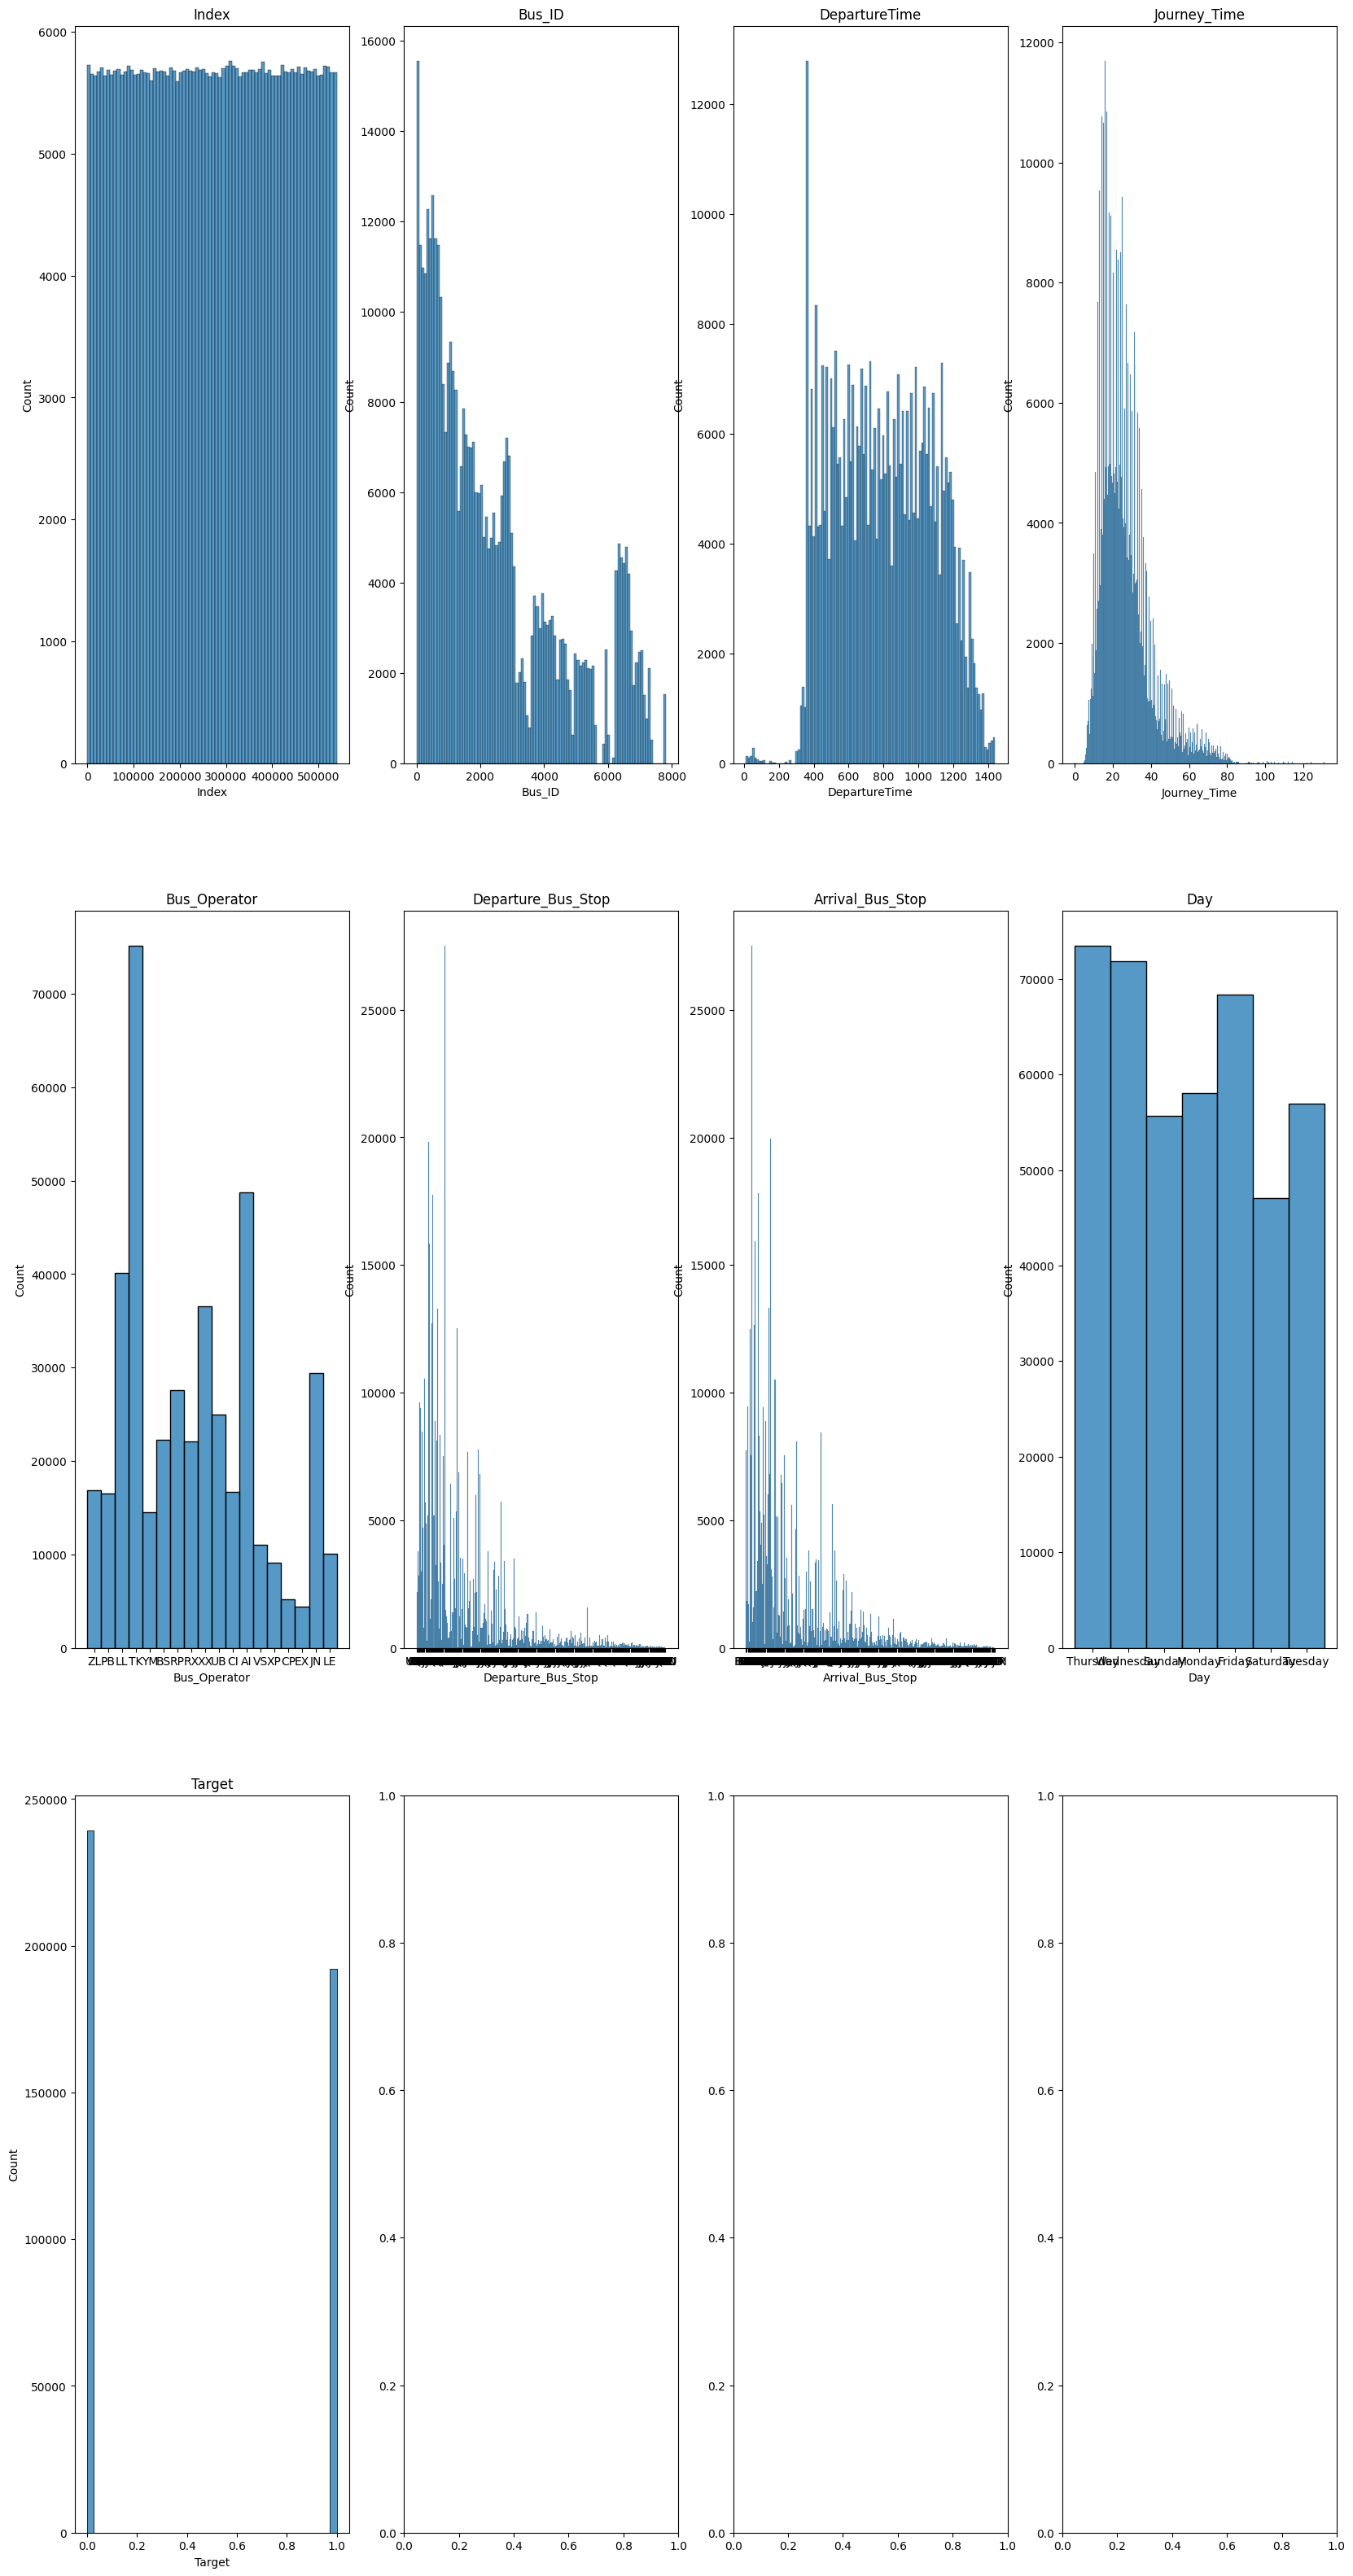

In [ ]:
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))
lists=["Unnamed: 0",'id','Departure Delay in Minutes', 'Arrival Delay in Minutes']
cols=[item for item in dataset.columns if item not in lists]
for i, order in enumerate(cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col]
    ax.set_title(f"{order}")
    sns.histplot(ax=ax,data=dataset[order])

plt.show()

#Encoding

In [ ]:
d = pd.concat([X,test_data],axis=0)
d

,Index,Bus_ID,DepartureTime,Journey_Time,Bus_Operator,Departure_Bus_Stop,Arrival_Bus_Stop,Day
0,448131,377,788,34.200000,ZL,UVZ,HZU,Thursday
1,240679,4225,1135,24.000000,PB,FYJ,EGO,Wednesday
2,519288,6390,735,17.000000,LL,VQD,VIR,Sunday
3,209857,2254,820,18.901852,TK,ODV,EXU,Monday
4,34627,6322,855,15.800000,LL,VIR,DFY,Monday
...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,YM,OJD,SEL,Saturday
107873,479701,2655,959,13.800000,VS,FKV,FOW,Saturday
107874,360982,3709,1300,22.320000,PB,GWZ,JUE,Thursday
107875,423397,5532,897,17.400000,BS,GFD,FPK,Saturday


#Label Encoding

In [136]:
  # x = [X,test_data]
              # X = pd.concat(x)
              # print(X.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# label = le.fit_transform(d['Bus_Operator'])
# d['Bus_Operator'] = label
label = le.fit_transform(d['Departure_Bus_Stop'])
d['Departure_Bus_Stop'] = label
label = le.fit_transform(d['Arrival_Bus_Stop'])
d['Arrival_Bus_Stop'] = label
# label = le.fit_transform(d['Day'])
# d['Day'] = label
              # test_data = X.iloc[43505:]
              # X = X.iloc[:len(dataset)]
              # label = le.fit_transform(test_data['Bus_Operator'])
              # test_data['Bus_Operator'] = label
              # label = le.fit_transform(test_data['Departure_Bus_Stop'])
              # test_data['Departure_Bus_Stop'] = label
              # label = le.fit_transform(test_data['Arrival_Bus_Stop'])
              # test_data['Arrival_Bus_Stop'] = label
              # label = le.fit_transform(test_data['Day'])
              # test_data['Day'] = label

# print(X.shape)
# test_data.shape
d
test_data = d[len(dataset):]
X = d[:len(dataset)]
# test_data
test_data

,Index,Bus_ID,DepartureTime,Journey_Time,Departure_Bus_Stop,Arrival_Bus_Stop,Day_0,Day_1,Day_2,Day_3,...,Bus_Operator_8,Bus_Operator_9,Bus_Operator_10,Bus_Operator_11,Bus_Operator_12,Bus_Operator_13,Bus_Operator_14,Bus_Operator_15,Bus_Operator_16,Bus_Operator_17
0,301196,1434,730,31.200000,177,163,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,116730,118,725,36.000000,100,283,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,133420,3624,420,20.000000,226,187,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120024,2753,1155,37.000000,100,166,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,323948,600,1085,41.000000,158,179,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,163,216,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
107873,479701,2655,959,13.800000,58,64,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
107874,360982,3709,1300,22.320000,88,120,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
107875,423397,5532,897,17.400000,81,66,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Plotting boxplots to detect outliers in each feature. Traveler Type and Checking Service need outlier removal

In [133]:
# num_rows = 4
# num_cols = 2
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

# for i, order in enumerate(d.columns):
#     row = i // num_cols
#     col = i % num_cols

#     ax = axes[row, col]
#     ax.set_title(f"{order}")

#     ax.boxplot(d[order])

# plt.show()


One hot

In [139]:
# d = pd.get_dummies(d, columns=['Day','Bus_Operator'])
# d

In [138]:
test_data

,Index,Bus_ID,DepartureTime,Journey_Time,Departure_Bus_Stop,Arrival_Bus_Stop,Day_0,Day_1,Day_2,Day_3,...,Bus_Operator_8,Bus_Operator_9,Bus_Operator_10,Bus_Operator_11,Bus_Operator_12,Bus_Operator_13,Bus_Operator_14,Bus_Operator_15,Bus_Operator_16,Bus_Operator_17
0,301196,1434,730,31.200000,177,163,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,116730,118,725,36.000000,100,283,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,133420,3624,420,20.000000,226,187,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120024,2753,1155,37.000000,100,166,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,323948,600,1085,41.000000,158,179,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107872,538493,363,465,25.781818,163,216,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
107873,479701,2655,959,13.800000,58,64,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
107874,360982,3709,1300,22.320000,88,120,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
107875,423397,5532,897,17.400000,81,66,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Plotting the heatmap to get the correlation between the columns

<Axes: >

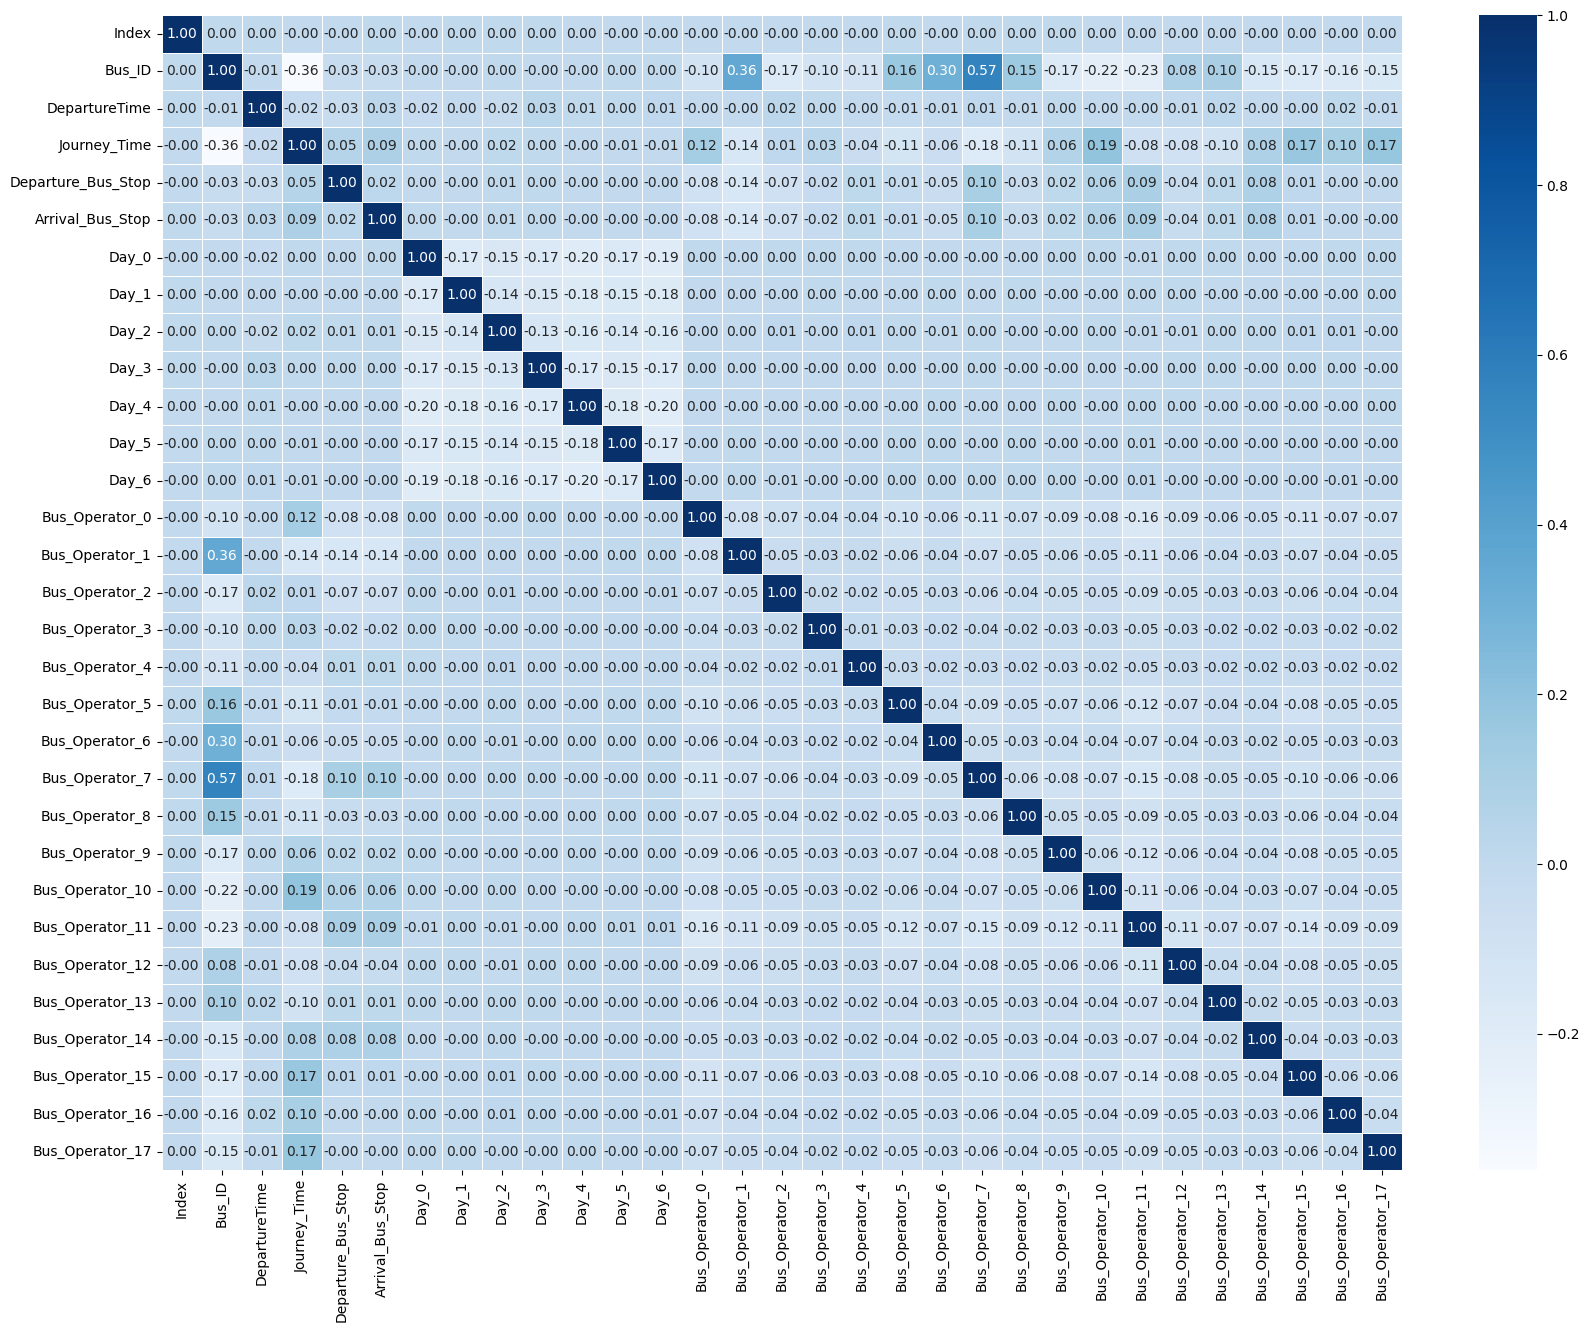

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(d.corr(numeric_only=True),annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')

#Logistic regression

In [ ]:
# model = LogisticRegression()
# model.fit(X,Y)
# y_pred = model.predict(test_data)
# pred_df = pd.concat([index_test,pd.Series(y_pred,name='Target')],axis=1)

# pred_df.to_csv('pred.csv',index=False)
# pred_df

In [ ]:
# y_pred = model.predict(test_data)
# y_pred

#Knn

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=6)

# knn.fit(X,Y)
# y_pred = knn.predict(test_data)
# pred_df = pd.DataFrame({'Index':test_data[:,0],'Target':y_pred})
# pred_df.to_csv('pred.csv',index=False)
# y_pred

#Random forest classification

In [ ]:
# n_estimators = [260,280,300]

# max_features = [0.2,0.6,1]

# max_samples = [0.5,0.75,1]

# min_samples_split = [2,5]



In [ ]:
# param_grid = {
#     'n_estiamtors':n_estimators,
#     'max_features':max_features,
#     'max_samples':max_samples,
#     'min_samples_split':min_samples_split
# }

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier()
# rf_grid = GridSearchCV(estimator=clf,
#                        param_grid = param_grid,
#                        cv = 5,
#                        verbose = 2,
#                        n_jobs = -1)
# clf.fit(X,Y.values.ravel())
# y_pred = clf.predict(test_data)
# test_id = test_data['Index']
# pred_df = pd.concat([test_id,pd.Series(y_pred,name='Target')],axis=1)

# pred_df.to_csv('pred.csv',index=False)

#Xg boost

In [ ]:
# import xgboost as xgb
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# xgb_model = xgb.XGBClassifier()

# param_grid = {
#     'max_depth': [8],
#     'learning_rate': [0.1],
#     'n_estimators': [385],
# }

# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X, Y)
# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the XGBoost model with the best hyperparameters

# best_xgb_model = xgb.XGBClassifier(**best_params)
# best_xgb_model.fit(X, Y)

# # Make predictions on the test set
# y_pred = best_xgb_model.predict(test_data)
# test_id = test_data['Index']
# pred_df = pd.concat([test_id,pd.Series(y_pred,name='Target')],axis=1)

# # pred_df = pd.DataFrame({'Index':t[:,0],'Target':y_pred})

# pred_df.to_csv('pred.csv',index=False)
# pred_df

In [ ]:
# import xgboost as xgb
# import matplotlib.pyplot as plt

# # Train your XGBoost model
# # Replace the following lines with your actual data loading and model training
# # X_train, y_train = load_training_data()
# # model = xgb.XGBClassifier()
# # model.fit(X_train, y_train)

# model = best_xgb_model

# # If you have a trained XGBoost model, you can get the feature importance scores
# importance_scores = model.feature_importances_

# # Create a DataFrame with feature names and their importance scores
# importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

# # Sort the DataFrame by importance score in descending order
# importance_df = importance_df.sort_values(by='Importance', ascending=False)

# # Create a bar plot to visualize feature importance
# plt.figure(figsize=(10, 6))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('XGBoost Feature Importance')
# plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
# plt.show()


#Standard scaling

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X)

X_test_std = scaler.transform(test_data)

In [142]:
X_test_std.shape

(107877, 31)

#SVM

In [ ]:
# from sklearn.model_selection import train_test_split

# # Splitting the data into train and test
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Finding best parameters for svm

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix, f1_score

# # Assuming you have X_train and Y_train defined
# # random_search_c.fit(X_train, Y_train)

# # Individual hyperparameter tuning for C
# param_dist_c = {'C': [0.1, 1, 10]}
# svm_model_c = SVC()
# random_search_c = RandomizedSearchCV(estimator=svm_model_c, param_distributions=param_dist_c, n_iter=3, scoring='f1_weighted', cv=3, n_jobs=-1)
# random_search_c.fit(X_train, Y_train)

# # Access the best parameters
# best_c = random_search_c.best_params_['C']
# print("Best C:", best_c)


KeyboardInterrupt: ignored

In [ ]:
# # Individual hyperparameter tuning for kernel
# param_dist_kernel = {'kernel': ['linear', 'rbf', 'sigmoid']}
# svm_model_kernel = SVC(C=best_c)  # Assuming best_c is already obtained from the previous search
# random_search_kernel = RandomizedSearchCV(estimator=svm_model_kernel, param_distributions=param_dist_kernel, n_iter=3, scoring='f1_weighted', cv=3, n_jobs=-1)
# random_search_kernel.fit(X_train, Y_train)  # Assuming you have X_train and Y_train defined

# # Access the best parameters
# best_kernel = random_search_kernel.best_params_['kernel']
# print("Best Kernel:", best_kernel)


In [ ]:
# # Individual hyperparameter tuning for gamma
# param_dist_gamma = {'gamma': [0.1, 1, 10]}
# svm_model_gamma = SVC(C=best_c, kernel=best_kernel)  # Assuming best_c and best_kernel are already obtained
# random_search_gamma = RandomizedSearchCV(estimator=svm_model_gamma, param_distributions=param_dist_gamma, n_iter=3, scoring='f1_weighted', cv=3, n_jobs=-1)
# random_search_gamma.fit(X_train, Y_train)  # Assuming you have X_train and Y_train defined

# # Access the best parameters
# best_gamma = random_search_gamma.best_params_['gamma']
# print("Best Gamma:", best_gamma)

# # Create the final SVM model with the best hyperparameters
# final_svm_model = SVC(C=best_c, kernel=best_kernel, gamma=best_gamma)

# # Fitting the final model on our training data
# final_svm_model.fit(X_train, Y_train)


In [ ]:
# best_params = {
#     'C': 10,
#     'kernel': 'rbf',
#     'gamma': 0.1
# }

# # Creating a new SVM model with the best hyperparameters
# best_svm_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

# # Fitting the best model on our training data
# best_svm_model.fit(X, Y)

# # Predictions on the test data
# Y_Prediction_svm = best_svm_model.predict(test_data)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

In [ ]:
# linear_svc = svm.SVC(kernel='linear')
# linear_svc.fit(X,Y)
# y_pred=linear_svc.predict(test_data)
# y_pred

#Neural Networks

In [143]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [144]:
X_train_std.shape

(431505, 31)

In [ ]:
# # setting up the layers of Neural Network

# model = keras.Sequential([

#                           keras.layers.Flatten(input_shape=(8,)),
#                           keras.layers.Dense(7, activation='relu'),
#                           keras.layers.Dense(6, activation='relu'),
#                           keras.layers.Dense(5, activation='relu'),
#                           keras.layers.Dense(4, activation='relu'),
#                           keras.layers.Dense(3, activation='relu'),
#                           keras.layers.Dense(2, activation='sigmoid')
# ])

In [145]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D

# # Assuming input_shape is (8, 1) for a 1D convolution
# input_shape = (8, 1)

# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(7, activation='relu'),
#     Dense(6, activation='relu'),
#     Dense(5, activation='relu'),
#     Dense(4, activation='relu'),
#     Dense(3, activation='relu'),
#     Dense(2, activation='sigmoid')
# ])

# # Display the model summary
# model.summary()
# setting up the layers of Neural Network

from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(31,)),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(20,activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(6, activation='relu'),
                          keras.layers.Dense(4, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
pip install tensorflow-addons


In [146]:
# compiling the Neural Network
from tensorflow.keras.optimizers import Nadam
optimizer = Nadam(learning_rate=0.001)  # You can adjust the learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for one-hot encoded labels
              metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])





In [148]:
# training the Neural Network
history = model.fit(X_train_std,Y, validation_split=0.1, epochs=10)

In [ ]:
y_pred = model.predict(X_test_std)
# pred_df = pd.DataFrame({'Index':test_data[:,0],'Target':y_pred})
# pred_df.to_csv('result.csv',index=False)
y_pred.shape
#  argmax function

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)
# converting the prediction probability to class labels

# import pandas as pd

# Assuming test_data is a Pandas DataFrame
pred_df = pd.DataFrame({'Index': test_data.iloc[:, 0], 'Target': Y_pred_labels})

# If test_data is a NumPy array, you can convert it to a DataFrame like this:
# pred_df = pd.DataFrame({'Index': test_data[:, 0], 'Target': Y_pred_labels})

pred_df.to_csv('pred.csv', index=False)


Visualizing accuracy and loss

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
# y_pred = model.predict(X_test_std)
# # pred_df = pd.DataFrame({'Index':test_data[:,0],'Target':y_pred})
# # pred_df.to_csv('result.csv',index=False)
# y_pred.shape

In [ ]:
# #  argmax function

# my_list = [0.25, 0.56]

# index_of_max_value = np.argmax(my_list)
# print(my_list)
# print(index_of_max_value)

In [ ]:
# # converting the prediction probability to class labels

# Y_pred_labels = [np.argmax(i) for i in y_pred]
# print(Y_pred_labels)

In [ ]:
# import pandas as pd

# # Assuming test_data is a Pandas DataFrame
# pred_df = pd.DataFrame({'Index': test_data.iloc[:, 0], 'Target': Y_pred_labels})

# # If test_data is a NumPy array, you can convert it to a DataFrame like this:
# # pred_df = pd.DataFrame({'Index': test_data[:, 0], 'Target': Y_pred_labels})

# pred_df.to_csv('result1.csv', index=False)
